In [ ]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import cv2.aruco as aruco


## Perspective Transformation


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from cv2 import aruco
import os 

image_path = "images/dataset/"


def extract_roi(image_path, draw_detected_markers=False):
    image = cv2.imread(image_path)
    #image = cv2.resize(image, (0, 0), fx = 0.1, fy = 0.1)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)
    parameters = aruco.DetectorParameters_create()
    corners, ids, rejected_img_points = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)

    if draw_detected_markers:
        cv2.imwrite("./detected_markers.png", cv2.aruco.drawDetectedMarkers(gray, corners, ids))
    if ids is not None and len(ids) == 4:
        corners = sort_corners(corners, ids)
    else:
        raise ValueError('Detected markers count is not equal to four.')

    # Define the destination points in the same order [top-left, top-right, bottom-right, bottom-left]
    dst_pts = np.array([ [600, 800], [0, 800], [600, 0], [0, 0]], dtype="float32")

    # Compute the perspective transform matrix and then apply it
    M = cv2.getPerspectiveTransform(corners, dst_pts)
    warped_img = cv2.warpPerspective(image, M, (600, 800))

    return warped_img
def sort_corners(corners, ids):
    # Assume that ids are [0, 1, 2, 3] for [top-left, top-right, bottom-right, bottom-left]
    # Each id corresponds to a marker, and each marker has 4 corners
    # Calculate the center of each marker and sort them
    markers_center = np.zeros((4,2), dtype=np.float32)
    for i, id in enumerate(ids):
        # Calculate the center point of each marker
        marker_center = np.average(corners[i][0], axis=0)
        markers_center[id[0]] = marker_center

    # If some ids are missing, this will raise a ValueError
    if np.any(np.sum(markers_center, axis=1) == 0):
        raise ValueError('Some corners were not assigned!')

    return markers_center

for file in os.listdir(image_path):
    path = os.path.join(image_path, file)
    if path.endswith(".JPG") or path.endswith(".jpg") or path.endswith(".png") or path.endswith(".HEIC"):
        print(path)
        img = extract_roi(path)
        cv2.imwrite(f"results/perspective/{path.split('/')[2]}", img)

images/dataset/sc_5_1.JPG
images/dataset/sc_5_0.JPG
images/dataset/sc_40_0.JPG
images/dataset/ph_9_3.jpg
images/dataset/sc_60_1.JPG
images/dataset/ph_10_3.jpg
images/dataset/ph_10_2.jpg
images/dataset/ph_9_2.jpg
images/dataset/ph_9_0.JPG
images/dataset/ph_10_0.JPG
images/dataset/ph_10_1.JPG
images/dataset/ph_9_1.JPG
images/dataset/sc_20_0.JPG
images/dataset/sc_0_0.JPG
images/dataset/sc_0p62_0.JPG
images/dataset/ph_8_0.JPG
images/dataset/ph_8_1.JPG
images/dataset/sc_0_1.JPG
images/dataset/ph_8_3.jpg
images/dataset/sc_2p5_1.JPG
images/dataset/sc_1p25_1.JPG
images/dataset/sc_1p25_0.JPG
images/dataset/sc_2p5_0.JPG
images/dataset/ph_8_2.jpg
images/dataset/sc_50_0.JPG
images/dataset/ph_6_0.JPG
images/dataset/ph_6_1.JPG
images/dataset/ph_6_3.jpg
images/dataset/ph_6_2.jpg
images/dataset/ph_7_3.jpg
images/dataset/ph_5_1.JPG
images/dataset/ph_5_0.JPG
images/dataset/ph_7_2.jpg
images/dataset/ph_7_0.JPG
images/dataset/ph_5_2.jpg
images/dataset/sc_30_0.JPG
images/dataset/ph_7_1.JPG
images/dataset/s

## Template matching for isolating roi

In [2]:
import cv2
import os

def template_matching(input_image_path, references_folder):
    # Read the input image
    input_image = cv2.imread(input_image_path)
    input_gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

    # Get a list of reference images
    reference_images = []
    for filename in os.listdir(references_folder):
        if filename.endswith(".JPG") or filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".HEIC"):
            reference_path = os.path.join(references_folder, filename)
            reference_image = cv2.imread(reference_path, cv2.IMREAD_GRAYSCALE)
            reference_images.append((filename, reference_image))

    # Apply template matching for each reference image
    for reference_name, reference_image in reference_images:
        result = cv2.matchTemplate(input_gray, reference_image, cv2.TM_CCOEFF_NORMED)
        _, _, _, max_loc = cv2.minMaxLoc(result)

        # Define the rectangle around the matched area
        h, w = reference_image.shape
        top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)

        # Draw a rectangle around the matched area
        cv2.rectangle(input_image, top_left, bottom_right, (0, 255, 0), 2)

        # Optionally, you can print or store the match confidence
        confidence = result[max_loc[1], max_loc[0]]
        print(f"Match for {reference_name}: Confidence = {confidence}")

    # Display the result
    return input_image
    #plt.imshow(input_image)

# Specify the path to the input image and the folder containing reference images
image_path = "results/perspective/"
references_folder = "results/references/"


for file in os.listdir(image_path):
    path = os.path.join(image_path, file)
    if path.endswith(".JPG") or path.endswith(".jpg") or path.endswith(".png") or path.endswith(".HEIC"):
        img = template_matching(path, references_folder)
        cv2.imwrite(f"results/boundingbox/{path.split('/')[2]}", img)
        print(f"results/boundingbox/{path.split('/')[2]} succesfully written.")


Match for up.JPG: Confidence = 0.9275288581848145
Match for down.JPG: Confidence = 0.8749508261680603
Match for left.JPG: Confidence = 0.9538418054580688
Match for base.JPG: Confidence = 0.6380670070648193
Match for right.JPG: Confidence = 0.9126993417739868
results/boundingbox/sc_5_1.JPG succesfully written.
Match for up.JPG: Confidence = 0.9391230940818787
Match for down.JPG: Confidence = 0.838984489440918
Match for left.JPG: Confidence = 0.935024082660675
Match for base.JPG: Confidence = 0.5651789903640747
Match for right.JPG: Confidence = 0.9293856024742126
results/boundingbox/sc_5_0.JPG succesfully written.
Match for up.JPG: Confidence = 0.9109790325164795
Match for down.JPG: Confidence = 0.8551088571548462
Match for left.JPG: Confidence = 0.9469966888427734
Match for base.JPG: Confidence = 0.6012722849845886
Match for right.JPG: Confidence = 0.9130617380142212
results/boundingbox/sc_40_0.JPG succesfully written.
Match for up.JPG: Confidence = 0.9180333614349365
Match for down.JPG

In [33]:
import cv2
import os

def template_matching(input_image_path, references_folder, output_folder):
    # Read the input image
    input_image = cv2.imread(input_image_path)
    input_gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

    # Get a list of reference images
    reference_images = []
    for filename in os.listdir(references_folder):
        if filename.endswith(".JPG") or filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".HEIC"):
            reference_path = os.path.join(references_folder, filename)
            reference_image = cv2.imread(reference_path, cv2.IMREAD_GRAYSCALE)
            reference_images.append((filename, reference_image))

    # List to store cropped regions
    cropped_regions = []

    # Apply template matching for each reference image
    for reference_name, reference_image in reference_images:
        result = cv2.matchTemplate(input_gray, reference_image, cv2.TM_CCOEFF_NORMED)
        _, _, _, max_loc = cv2.minMaxLoc(result)

        # Define the rectangle around the matched area
        h, w = reference_image.shape
        top_left = max_loc
        bottom_right = (top_left[0]+w, top_left[1] + h)

        # Crop the region inside the bounding box
        cropped_region = input_image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
        cropped_region = cv2.resize(cropped_region, (256, 256))

        cropped_regions.append((reference_name, cropped_region))

        # Draw a rectangle around the matched area
        #cv2.rectangle(input_image, top_left, bottom_right, (0, 255, 0), 2)

        # Optionally, you can print or store the match confidence
        confidence = result[max_loc[1], max_loc[0]]
        print(f"Match for {reference_name}: Confidence = {confidence}")


    # Save cropped regions to the output folder
    for reference_name, cropped_region in cropped_regions:
        # Create a subfolder for each reference image
        #reference_output_folder = os.path.join(output_folder, reference_name)
        #os.makedirs(reference_output_folder, exist_ok=True)

        # Save each cropped region to the subfolder
        output_path = os.path.join(output_folder, reference_name)
        cv2.imwrite(output_path, cropped_region)
        print(f"Cropped region saved to {output_path}")

# Specify the path to the input image folder, the folder containing reference images, and the output folder
image_folder = "results/perspective/"
references_folder = "results/references/"
output_folder = "results/cropped/"

# Create the output folder if it doesn't exist
#os.makedirs(output_folder, exist_ok=True)

# Apply template matching for each image in the input folder
for file in os.listdir(image_folder):
    path = os.path.join(image_folder, file)
    out_path = os.path.join(output_folder, file.split('.')[0])
    os.makedirs(out_path, exist_ok = True)
    #print(out_path)
    if path.endswith(".JPG") or path.endswith(".jpg") or path.endswith(".png") or path.endswith(".HEIC"):
        template_matching(path, references_folder, out_path)


Match for up.JPG: Confidence = 0.9275288581848145
Match for down.JPG: Confidence = 0.8749508261680603
Match for left.JPG: Confidence = 0.9538418054580688
Match for base.JPG: Confidence = 0.6380670070648193
Match for right.JPG: Confidence = 0.9126993417739868
Cropped region saved to results/cropped/sc_5_1/up.JPG
Cropped region saved to results/cropped/sc_5_1/down.JPG
Cropped region saved to results/cropped/sc_5_1/left.JPG
Cropped region saved to results/cropped/sc_5_1/base.JPG
Cropped region saved to results/cropped/sc_5_1/right.JPG
Match for up.JPG: Confidence = 0.9391230940818787
Match for down.JPG: Confidence = 0.838984489440918
Match for left.JPG: Confidence = 0.935024082660675
Match for base.JPG: Confidence = 0.5651789903640747
Match for right.JPG: Confidence = 0.9293856024742126
Cropped region saved to results/cropped/sc_5_0/up.JPG
Cropped region saved to results/cropped/sc_5_0/down.JPG
Cropped region saved to results/cropped/sc_5_0/left.JPG
Cropped region saved to results/cropped

## Isolating reference colors

In [1]:
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Read the image
image_path = "results/cropped/ph_10_0/left.JPG"
img_right = cv2.imread(image_path)

# Convert the image to HSV
img_hsv_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2HSV)
img_hsv_left = cv2.cvtColor(img_right, cv2.COLOR_BGR2HSV)
img_hsv_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2HSV)
img_hsv_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2HSV)

# Separate the channels
hue_channel = img_hsv[:, :, 0]
saturation_channel = img_hsv[:, :, 1]
value_channel = img_hsv[:, :, 2]

# Create a 1x3 grid for subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot Hue Channel
im_hue = axes[0].imshow(hue_channel, cmap='hsv', vmin=0, vmax=179)
axes[0].set_title('Hue Channel')
divider = make_axes_locatable(axes[0])
cax = divider.append_axes("right", size="15%", pad=0.05)
plt.colorbar(im_hue, cax=cax)

# Plot Saturation Channel
im_saturation = axes[1].imshow(saturation_channel, cmap='viridis', vmin=0, vmax=255)
axes[1].set_title('Saturation Channel')
divider = make_axes_locatable(axes[1])
cax = divider.append_axes("right", size="15%", pad=0.05)
plt.colorbar(im_saturation, cax=cax)

# Plot Value Channel
im_value = axes[2].imshow(value_channel, cmap='gray', vmin=0, vmax=255)
axes[2].set_title('Value Channel')
divider = make_axes_locatable(axes[2])
cax = divider.append_axes("right", size="15%", pad=0.05)
plt.colorbar(im_value, cax=cax)

# Adjust layout
plt.tight_layout()
plt.show()



NameError: name 'img_hsv' is not defined

In [34]:
import os
import cv2

def apply_threshold(img_path, output_img_path, threshold_value ):
    # Read the image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    # Apply thresholding
    _, thresholded = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)
    cv2.imwrite(output_img_path, thresholded)
    print(f"Thresholded mask saved: {output_img_path}")



    
tmp = "results/cropped/"
input_folders = [os.path.join(tmp,x) for x in os.listdir(tmp) if os.path.isdir(os.path.join(tmp,x))]

in_out_pair = {}


for folder in input_folders:
    for image_name in os.listdir(folder):
        if not image_name.endswith((".JPG", ".jpg", ".png", ".jpeg")):
            continue

        out_path = folder.replace("cropped", "masks")
        in_path = os.path.join(folder, image_name)
        os.makedirs(out_path, exist_ok = True)
        out_path = in_path.replace("cropped", "masks")
        in_out_pair[in_path] = out_path
        #print(f"folder : {folder}, image_name = {image_name}, in_path = {in_path}, out_path = {out_path}")    
    



# Specify the threshold value (adjust as needed)
threshold = 180

# Iterate over images in the input folder
for key in in_out_pair:
    apply_threshold(key, in_out_pair[key], threshold)



Thresholded mask saved: results/masks/sc_50_0/up.JPG
Thresholded mask saved: results/masks/sc_50_0/down.JPG
Thresholded mask saved: results/masks/sc_50_0/left.JPG
Thresholded mask saved: results/masks/sc_50_0/base.JPG
Thresholded mask saved: results/masks/sc_50_0/right.JPG
Thresholded mask saved: results/masks/sc_0_1/up.JPG
Thresholded mask saved: results/masks/sc_0_1/down.JPG
Thresholded mask saved: results/masks/sc_0_1/left.JPG
Thresholded mask saved: results/masks/sc_0_1/base.JPG
Thresholded mask saved: results/masks/sc_0_1/right.JPG
Thresholded mask saved: results/masks/sc_10_1/up.JPG
Thresholded mask saved: results/masks/sc_10_1/down.JPG
Thresholded mask saved: results/masks/sc_10_1/left.JPG
Thresholded mask saved: results/masks/sc_10_1/base.JPG
Thresholded mask saved: results/masks/sc_10_1/right.JPG
Thresholded mask saved: results/masks/sc_10_0/up.JPG
Thresholded mask saved: results/masks/sc_10_0/down.JPG
Thresholded mask saved: results/masks/sc_10_0/left.JPG
Thresholded mask sav

In [6]:
# Iterate over images in the input folder
# img = img ; file_name = name of the image, output_folder = target_folder
def get_gradients(img, file_name, mask_output_path, gradient_output_path):
    try:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        _, thresholded = cv2.threshold(img_gray, threshold_value, 255, cv2.THRESH_BINARY_INV)
        mask_output_path = os.path.join(mask_output_path, file_name)
        cv2.imwrite(mask_output_path, thresholded)
        print(f"Mask saved: {mask_output_path}")
        img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        masked_img = cv2.bitwise_and(img_hsv, img_hsv, mask=thresholded)
        # Extract HSV values where the mask is applied
        hsv_values = masked_img[thresholded > 0]
        sorted_hsv_values = sorted(hsv_values, key=lambda x: x[0])
        print(len(sorted_hsv_values))
        # Create a gradient image using the sorted HSV values
        gradient_img = np.zeros_like(img)
        num_steps = len(sorted_hsv_values) - 1
        for i in range(num_steps):
            start_color = np.array(sorted_hsv_values[i], dtype=np.uint8)
            end_color = np.array(sorted_hsv_values[i + 1], dtype=np.uint8)
            for j in range(10):  # Adjust the number of steps as needed
                fraction = j / 10.0
                interpolated_color = interpolate_color(start_color, end_color, fraction)
                interpolated_color_bgr = cv2.cvtColor(np.uint8([[interpolated_color]]), cv2.COLOR_HSV2BGR)[0, 0]
                gradient_img[i * 10 + j, :, :] = interpolated_color_bgr
                print("here")
        # Save the gradient image
        gradient_output_path = os.path.join(gradient_output_path, f"{file_name}")
        cv2.imwrite(gradient_output_path, gradient_img)
        print(f"Gradient image saved: {gradient_output_path}")
    except Exception as e:
        print(f"error with call parameters => file_name : {file_name} || {mask_output_path} || {gradient_output_path} + \n {e}")
    
    
input_folder = "results/cropped/"
mask_output_folder = "results/masks/"
gradient_output_folder = "results/gradients"

threshold_value = 160

for folder in os.listdir(input_folder): # folder -> ph_10_0
    if folder.endswith("DS_Store"):
        continue
    input_folder_path = os.path.join(input_folder, folder) #results/cropped/ph_10_0, ph_10_1 , ...
    for file_name in os.listdir(input_folder_path): # up.jpg, down.jpg, base.jpg ...
        if file_name.endswith((".jpg", ".JPG",".jpeg", ".png")):
            image_path = os.path.join(input_folder_path, file_name) #results/cropped/ph_10_0/up.jpg, ...
            mask_output_folder_tmp = os.path.join(mask_output_folder, folder) #results/masks/ph_10_0
            gradient_output_folder_tmp = os.path.join(gradient_output_folder, folder) #results/gradients/ph_10_0
            img = cv2.imread(image_path)
            os.makedirs(mask_output_folder_tmp, exist_ok = True)
            os.makedirs(gradient_output_folder_tmp, exist_ok = True)
            get_gradients(img, file_name, mask_output_folder_tmp, gradient_output_folder_tmp)

Mask saved: results/masks/sc_50_0/up.JPG
8910
error with call parameters => file_name : up.JPG || results/masks/sc_50_0/up.JPG || results/gradients/sc_50_0 + 
 name 'interpolate_color' is not defined
Mask saved: results/masks/sc_50_0/down.JPG
8118
error with call parameters => file_name : down.JPG || results/masks/sc_50_0/down.JPG || results/gradients/sc_50_0 + 
 name 'interpolate_color' is not defined
Mask saved: results/masks/sc_50_0/left.JPG
14238
error with call parameters => file_name : left.JPG || results/masks/sc_50_0/left.JPG || results/gradients/sc_50_0 + 
 name 'interpolate_color' is not defined
Mask saved: results/masks/sc_50_0/base.JPG
38192
error with call parameters => file_name : base.JPG || results/masks/sc_50_0/base.JPG || results/gradients/sc_50_0 + 
 name 'interpolate_color' is not defined
Mask saved: results/masks/sc_50_0/right.JPG
13560
error with call parameters => file_name : right.JPG || results/masks/sc_50_0/right.JPG || results/gradients/sc_50_0 + 
 name 'inte

In [17]:
import cv2
import numpy as np
import os  # Ensure os is imported

def split_hsv_channels(img, output_folder_path=""):
    # Read the image in color
    # Convert the image from BGR to HSV color space
    hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # Split the HSV image into individual channels
    h_channel, s_channel, v_channel = cv2.split(hsv_image)
    
    # Save the Hue channel. Hue values range from 0 to 180 in OpenCV, so we normalize it to the 0-255 range.
    cv2.imwrite(os.path.join(output_folder_path, 'hue_channel.png'), np.uint8((h_channel / 180.0) * 255.0))
    
    # Save the Saturation channel
    cv2.imwrite(os.path.join(output_folder_path, 'saturation_channel.png'), s_channel)
    
    # Save the Value channel
    cv2.imwrite(os.path.join(output_folder_path, 'value_channel.png'), v_channel)
    
    print("HSV channels saved as grayscale images.")


sample_name = "sc_60_1"


# Replace 'path_to_your_image.jpg' with the path to the image you want to process
inp = f"results/cropped/{sample_name}/base.JPG"
out = f"results/cropped/{sample_name}/"
img = cv2.imread(inp)

split_hsv_channels(img, out)


HSV channels saved as grayscale images.


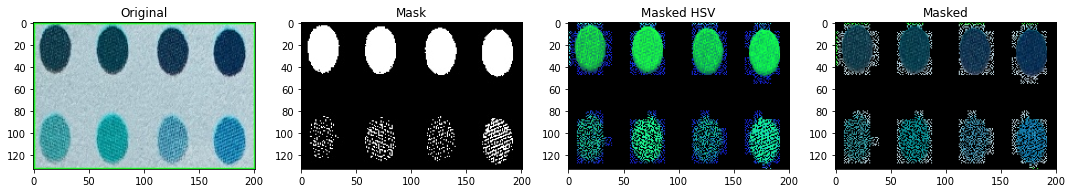

In [19]:
img = cv2.imread("results/cropped/ph_10_0/up.JPG")
mask = cv2.imread("results/masks/ph_10_0/up.JPG", cv2.IMREAD_GRAYSCALE)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
masked_img_hsv = cv2.bitwise_and(img_hsv, img_hsv, mask=mask)
masked_img = cv2.cvtColor(masked_img_hsv, cv2.COLOR_HSV2BGR)



fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Plot Hue Channel
orig_img = axes[0].imshow(img, cmap = 'hsv', vmin=0, vmax=179)
axes[0].set_title('Original')


mask = axes[1].imshow(mask, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Mask')

# Plot Value Channel
masked = axes[2].imshow(masked_img_hsv, cmap='hsv', vmin=0, vmax=255)
axes[2].set_title('Masked HSV')

masked = axes[3].imshow(masked_img, cmap='hsv', vmin=0, vmax=255)
axes[3].set_title('Masked')
plt.savefig("plots/masked.png")
# Adjust layout
plt.tight_layout()
plt.show()

Dominant Colors:
H: 0, S: 0, V: 0
H: 19, S: 180, V: 87
H: 19, S: 106, V: 113
H: 59, S: 237, V: 240
H: 24, S: 154, V: 172
H: 23, S: 53, V: 209
H: 19, S: 232, V: 75
H: 25, S: 228, V: 151


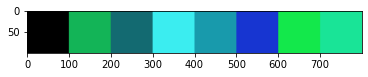

In [21]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming masked_img_hsv is already defined
img = cv2.imread("results/cropped/ph_10_0/up.JPG")
mask = cv2.imread("results/masks/ph_10_0/up.JPG", cv2.IMREAD_GRAYSCALE)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
masked_img_hsv = cv2.bitwise_and(img_hsv, img_hsv, mask=mask)
masked_img = cv2.cvtColor(masked_img_hsv, cv2.COLOR_HSV2BGR)

# Reshape the masked_img_hsv to a 2D array
reshaped_img_hsv = masked_img_hsv.reshape((-1, 3))

# Use k-means clustering to find dominant colors
num_clusters = 8
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(reshaped_img_hsv)

# Get the cluster centers as dominant colors
dominant_colors = kmeans.cluster_centers_.astype(int)

# Display the dominant colors
print("Dominant Colors:")
for color in dominant_colors:
    print(f"H: {color[0]}, S: {color[1]}, V: {color[2]}")

# Create an image to visualize the dominant colors
dominant_colors_img = np.zeros((100, num_clusters * 100, 3), dtype=np.uint8)
for i, color in enumerate(dominant_colors):
    dominant_colors_img[:, i * 100:(i + 1) * 100, :] = color

cv2.imwrite("plots/dominant.png", dominant_colors_img)

# Display the image with dominant colors
plt.imshow(dominant_colors_img)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


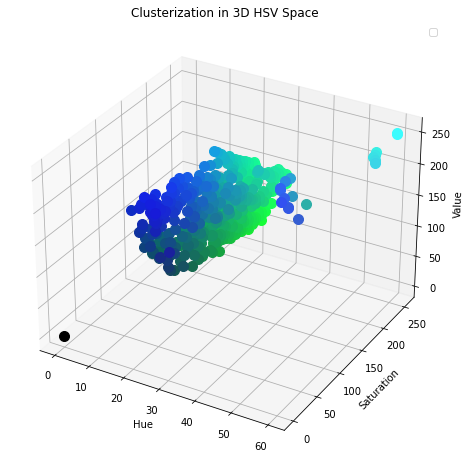

In [22]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming masked_img_hsv is already defined
img = cv2.imread("results/cropped/ph_10_0/up.JPG")
mask = cv2.imread("results/masks/ph_10_0/up.JPG", cv2.IMREAD_GRAYSCALE)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
masked_img_hsv = cv2.bitwise_and(img_hsv, img_hsv, mask=mask)
masked_img = cv2.cvtColor(masked_img_hsv, cv2.COLOR_HSV2BGR)

# Reshape the masked_img_hsv to a 2D array
reshaped_img_hsv = masked_img_hsv.reshape((-1, 3))

# Use k-means clustering to find dominant colors
num_clusters = 500
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(reshaped_img_hsv)

# Get the cluster centers as dominant colors
dominant_colors = kmeans.cluster_centers_.astype(int)

# Display the dominant colors
#print("Dominant Colors:")
#for color in dominant_colors:
#    print(f"H: {color[0]}, S: {color[1]}, V: {color[2]}")

# Create a larger 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot points for each cluster
for i, color in enumerate(dominant_colors):
    ax.scatter(color[0], color[1], color[2], c=[color / 255.0], s=100)

ax.set_xlabel('Hue')
ax.set_ylabel('Saturation')
ax.set_zlabel('Value')
ax.set_title('Clusterization in 3D HSV Space')

plt.legend()
plt.savefig("plots/clusters.png")
plt.show()
